In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import sklearn.decomposition
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')
from lib import *

plt.style.use('../peptidome.mplstyle')

In [2]:
p = np.random.dirichlet(0.5*np.ones(10))
eexact = entropy(p, base=2)

In [3]:
e = []
eg = []
en = []
for i in range(1000):
    n = np.random.multinomial(20, p)
    e.append(entropy(n/np.sum(n), base=2))
    eg.append(entropy_grassberger(n) / np.log(2))
    en.append(float(entropy_nsb(n)) / np.log(2))

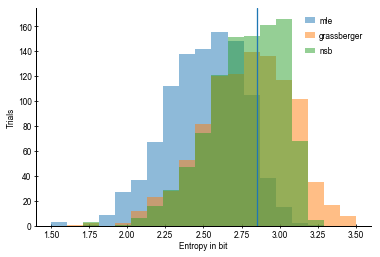

In [17]:
bins = np.linspace(1.5, 3.5, 20)
plt.hist(e, bins=bins, alpha=.5, label='mle')
plt.hist(eg, bins=bins, alpha=.5, label='grassberger')
plt.hist(en, bins=bins, alpha=.5, label='nsb')
plt.axvline(eexact)
plt.legend()
plt.xlabel('Entropy in bit')
plt.ylabel('Trials')
plt.savefig("main.png")

In [8]:
eexact, list(zip([np.mean(e), np.mean(eg), np.mean(en)], [np.std(e), np.std(eg), np.std(en)]))

(2.8512574222124085,
 [(2.505992186732367, 0.2494567336514956),
  (2.783530625786959, 0.28651440725998145),
  (2.7727608979544494, 0.2418081066571336)])